Install packages

In [ ]:
!pip install matplotlib==3.6.3
!pip install basemap
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import packages

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import rasterio   
import numpy as np 
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image

Define function to read raster values
Input: raster path (file_name), NA value in raster (na_value), scale factor (sf)
Output: matrix of raster values (values), latitude values (lats), and longitude values (lons).

In [ ]:
def read_tif(file_name, na_value,sf):
  with rasterio.open(file_name) as src:
      values_ori = src.read(1)
      height = values_ori.shape[0]
      width = values_ori.shape[1]
      cols, rows = np.meshgrid(np.arange(width), np.arange(height))
      xs, ys = rasterio.transform.xy(src.transform, rows, cols)
      lons= np.array(xs)
      lats = np.array(ys)
  values = np.ma.masked_equal(values_ori, value =na_value)*sf
  return values,lons,lats

Define a function to plot global raster file. Input: daytime and nighttime LST raster values (nit_vs, day_vs), longitude and latitude values (lons,lats), viewing longitude and latitude (lat_r, lon_r), and save path for figures (save_path). Output: figures with differernt viewing longitude values.

In [ ]:
def plot(nit_vs,day_vs,lons,lats,lat_r,lon_r,save_path):
  m = Basemap(projection='ortho',lon_0=lon_r,lat_0=lat_r,resolution='l')
  x1,y1=m(lons,lats)

  fig, ax = plt.subplots(figsize=(3, 5))
  plt.rcParams.update({'font.size': 10})
  #plot nighttime
  ax1 = fig.add_subplot(121)
  levels=np.linspace(0,60,16)
  cntr = m.contourf(x1, y1,nit_vs,levels,cmap=get_cmap("RdBu_r"))
  #add basemap
  m.bluemarble()
  ax1.title.set_text('Mid-nighttime')
  #plot daytime
  ax2 = fig.add_subplot(122)
  cntr = m.contourf(x1, y1,day_vs,levels,cmap=get_cmap("RdBu_r"))
  m.bluemarble()
  ax2.title.set_text('Mid-daytime')

  # add color bar below chart
  divider = make_axes_locatable(ax)
  ax.axis('off')
  cax = divider.new_vertical(size='4%', pad=-0.9, pack_start = True)
  fig.add_axes(cax)
  fig.colorbar(cntr, cax = cax, orientation = 'horizontal')
  cax.set_xlabel('Land Surface Temperature (C)')
  ax.axis('scaled')

  # save figure
  png_path=save_path+'/'+str(lon_r)+"_"+str(lat_r)+'.png'
  plt.savefig(png_path,dpi=300,pad_inches =0.1,bbox_inches = 'tight')                     
  plt.show() 
  print ('finish plotting '+str(lon_r))


Define a function to creat gif file. Input: save path for figures (save_path) and gif file (save_gif), viewing latitude (lat_r). Output: global_lst.gif file.

In [ ]:
def creat_gif(save_path,save_gif,lat_r):
  frames = []
  lon_rs1=list(range(50,185,5))
  lon_rs2=list(range(-180,50,5))
  lon_rs=lon_rs1+lon_rs2
  for lon_r in lon_rs:
      png_path=save_path+'/'+str(lon_r)+"_"+str(lat_r)+'.png'
      frames.append(Image.open(png_path))

  frames = [frame.convert('PA') for frame in frames]

  frames[0].save(save_gif, format='GIF',
                append_images=frames[1:],
                save_all=True,
                duration=0.3, loop=0, transparency=0)

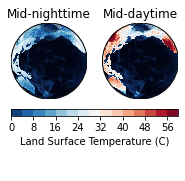

finish plotting -180


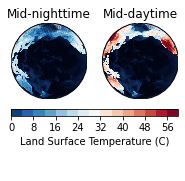

finish plotting -175


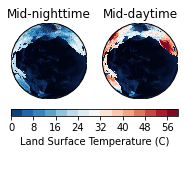

finish plotting -170


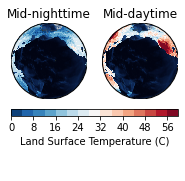

finish plotting -165


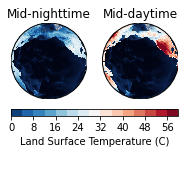

finish plotting -160


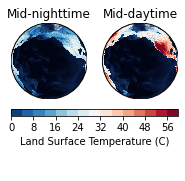

finish plotting -155


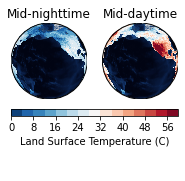

finish plotting -150


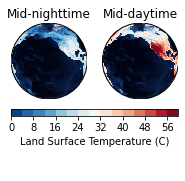

finish plotting -145


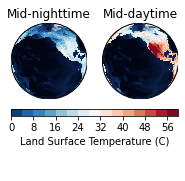

finish plotting -140


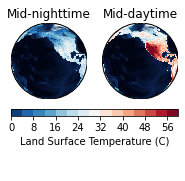

finish plotting -135


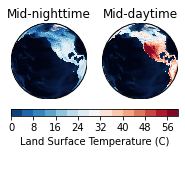

finish plotting -130


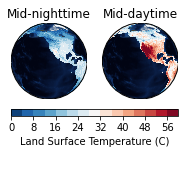

finish plotting -125


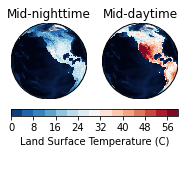

finish plotting -120


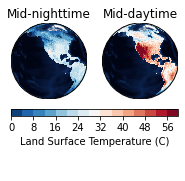

finish plotting -115


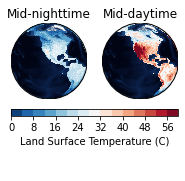

finish plotting -110


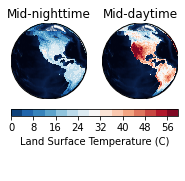

finish plotting -105


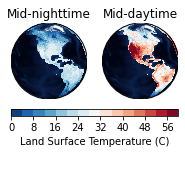

finish plotting -100


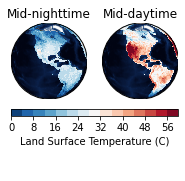

finish plotting -95


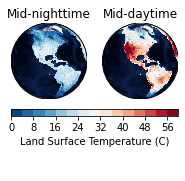

finish plotting -90


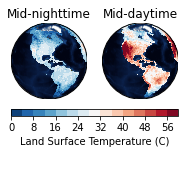

finish plotting -85


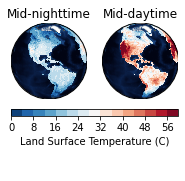

finish plotting -80


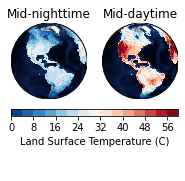

finish plotting -75


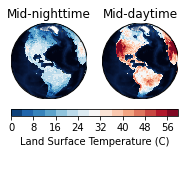

finish plotting -70


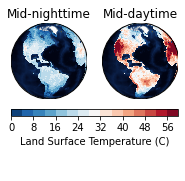

finish plotting -65


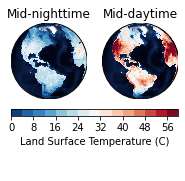

finish plotting -60


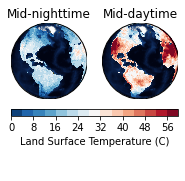

finish plotting -55


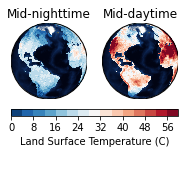

finish plotting -50


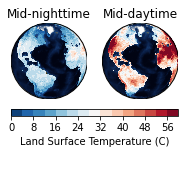

finish plotting -45


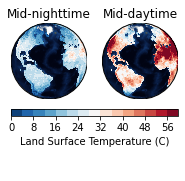

finish plotting -40


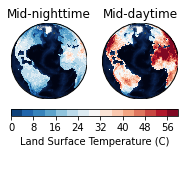

finish plotting -35


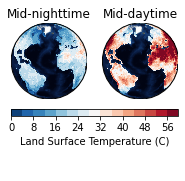

finish plotting -30


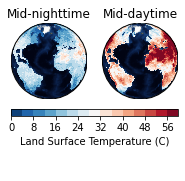

finish plotting -25


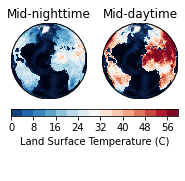

finish plotting -20


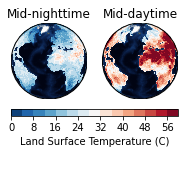

finish plotting -15


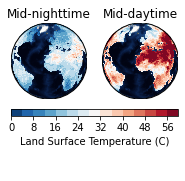

finish plotting -10


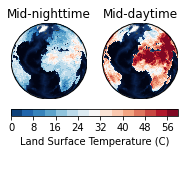

finish plotting -5


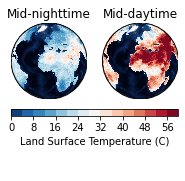

finish plotting 0


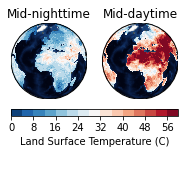

finish plotting 5


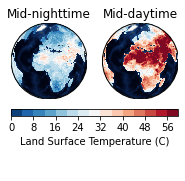

finish plotting 10


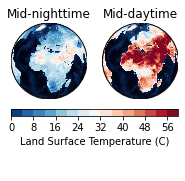

finish plotting 15


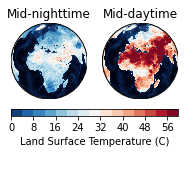

finish plotting 20


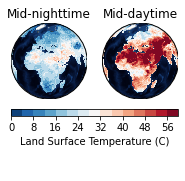

finish plotting 25


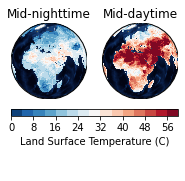

finish plotting 30


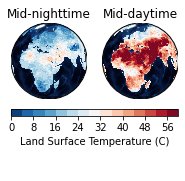

finish plotting 35


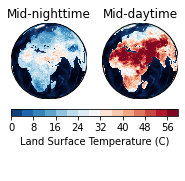

finish plotting 40


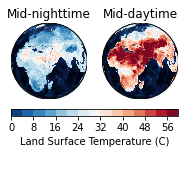

finish plotting 45


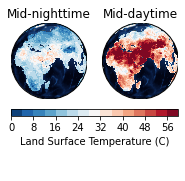

finish plotting 50


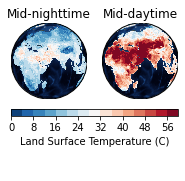

finish plotting 55


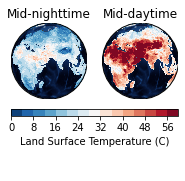

finish plotting 60


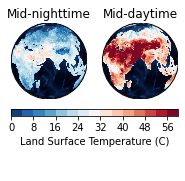

finish plotting 65


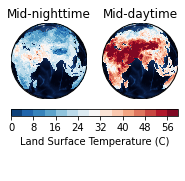

finish plotting 70


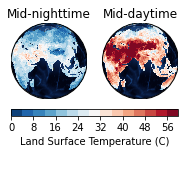

finish plotting 75


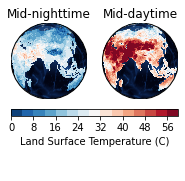

finish plotting 80


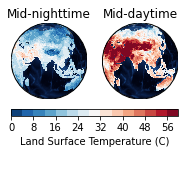

finish plotting 85


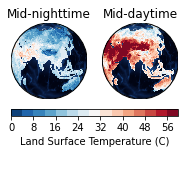

finish plotting 90


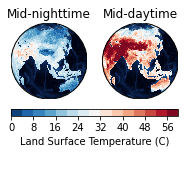

finish plotting 95


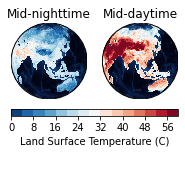

finish plotting 100


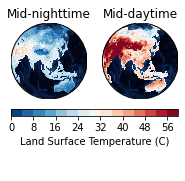

finish plotting 105


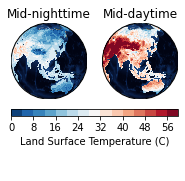

finish plotting 110


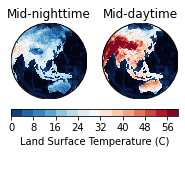

finish plotting 115


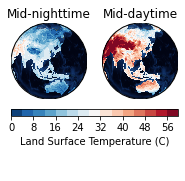

finish plotting 120


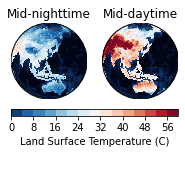

finish plotting 125


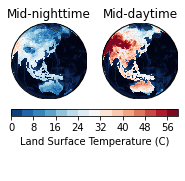

finish plotting 130


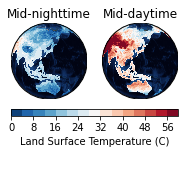

finish plotting 135


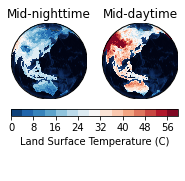

finish plotting 140


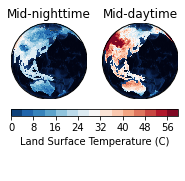

finish plotting 145


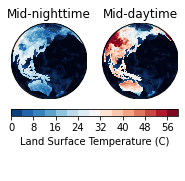

finish plotting 150


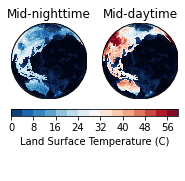

finish plotting 155


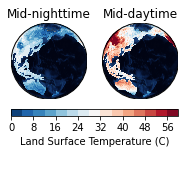

finish plotting 160


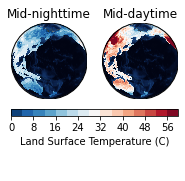

finish plotting 165


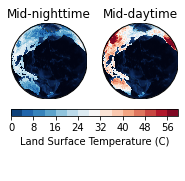

finish plotting 170


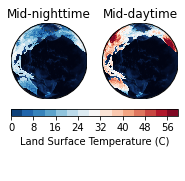

finish plotting 175


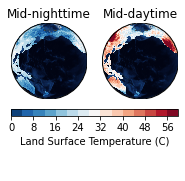

finish plotting 180


In [ ]:
save_path='/content/drive/MyDrive/LST_plot'
nit_img = '/content/drive/MyDrive/lst_nit_lg0.tif'
day_img = '/content/drive/MyDrive/lst_day_lg0.tif'
save_gif='/content/drive/MyDrive/globe_lst.gif'

# get raster values
nit_vs,lons,lats=read_tif(nit_img,-32768,0.1)
day_vs,lons,lats=read_tif(day_img,-32768,0.1)
# plot each scene for gif
lon_rs=list(range(-180,185,5))
lat_r=20
for lon_r in lon_rs:
  plot(nit_vs,day_vs,lons,lats,lat_r,lon_r,save_path)

# create gif
creat_gif(save_path,save_gif,lat_r)

In [ ]:
save_path='/content/drive/MyDrive/LST_plot'
save_gif='/content/drive/MyDrive/globe_lst.gif'
lat_r=20
creat_gif(save_path,save_gif,lat_r)

